# Project 2
## Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

## Learning Outcomes:
- Exploratory Data Analysis
- Preparing the data to train a model 
- Training and making predictions using a classification model 
- Model evaluation

### 1. Import Libraries

In [212]:
# Step1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, f_oneway
from statsmodels.stats.power import ttest_power
from statsmodels.stats.proportion import proportions_ztest

sns.set(color_codes=True)


### 2. Read Data

In [213]:
# Step 2: Read Data
banking = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

### 3. Perform basic EDA

#### 3.1 Shape

In [214]:
# Step 3.1 Shape of Data
banking.shape

(5000, 14)

#### 3.2 Types

In [215]:
# Step 3.2 Data Type of each attribute
banking.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [216]:
banking.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### 3.3 Check missing Values

In [217]:
# Step 3.3 Check missing values
banking.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [218]:
#### 3.4 Summary

In [219]:
# Step 3.4 Summary of numerical attributes
banking.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Data Cleanup
- Experience column contains negative values. Remove rows 
- Remove ID Column
- ZIP Code convert to String
- Education - Categorical -  1 (Undergrad), 2 (Graduate), 3 (Advanced/Professional)
- Personal Loan - Categorical Variable - 0 (did not take the loan), 1 (Took the offered Loan)
- Securities Account - Categorical - 0 (No), 1 (Yes)
- CD Account - Categorical - 0 (No), 1 (yes)
- Online - Categorical - 0 (No), 1 (Yes)
- Credit Card - Categorical - 0 (No), 1 (Yes)

In [220]:
#Creating a copy of the original data frame
banking_original = banking.copy()


columns_to_drop = ['ID']
banking.drop(columns_to_drop, inplace=True, axis=1)

In [221]:
# Count Experience with -ve values
# print(banking['Experience'].value_counts())

# There are about 50 rows with -ve Experience Values - Removing them
banking = banking[banking['Experience'] > 0]

# Add Category for people with Mortgage > 0
banking.assign(Mortgage_Cat=[1 if x > 0 else 1 for x in banking['Mortgage']])

# Selecting categorical columns

categorical_columns = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'ZIP Code', 'Mortgage_Cat']

#Looping through the columns and changing type to 'category'

for column in categorical_columns:
    banking[column] = banking[column].astype('category')



KeyError: 'Mortgage_Cat'

In [52]:
banking.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4882.0,45.826506,11.155088,25.0,36.0,46.0,55.00,67.0
Experience,4882.0,20.605899,11.136704,1.0,11.0,21.0,30.00,43.0
Income,4882.0,73.870750,46.112752,8.0,39.0,64.0,98.00,224.0
Family,4882.0,2.386112,1.148222,1.0,1.0,2.0,3.00,4.0
CCAvg,4882.0,1.935412,1.745065,0.0,0.7,1.5,2.60,10.0
Mortgage,4882.0,56.844326,102.009136,0.0,0.0,0.0,101.75,635.0


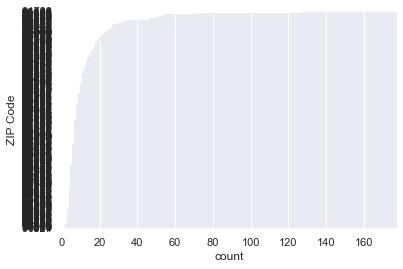

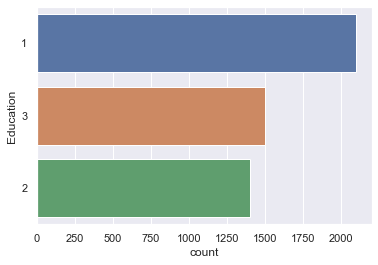

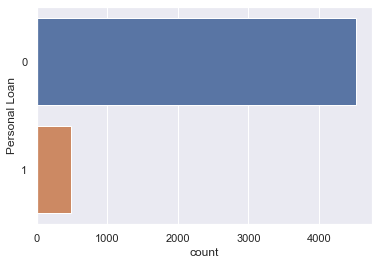

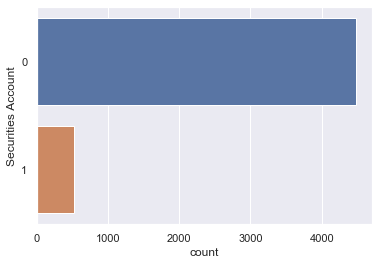

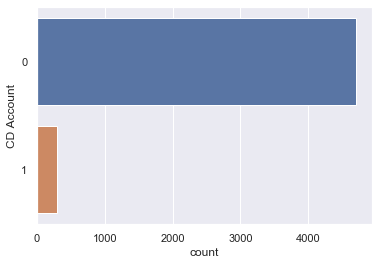

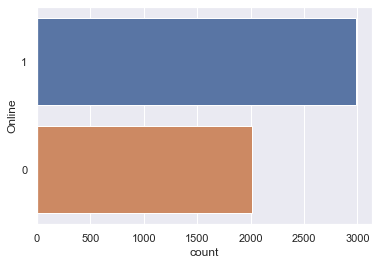

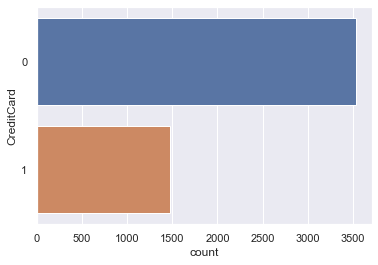

In [22]:
# The easiest way to understand the distribution of the categorical variables would be to plot bar plots. 
# I use value_counts() method to sort the bars in descending order.

# Bar plots of categorical features
for feature in banking.dtypes[banking.dtypes == 'category'].index:
    sns.countplot(y=feature, data=banking, order = banking[feature].value_counts().index)
    plt.show()

#### The above distribution shows:
- Personal Loan Column has similar proportion as CD Account and Securities Account

In [65]:
print("% of people with Personal Loan")
print(banking['Personal Loan'].value_counts()/banking['Personal Loan'].count())
print("% of people with Securities Account")
print(banking['Securities Account'].value_counts()/banking['Securities Account'].count())
print("% of people with CD Account")
print(banking['CD Account'].value_counts()/banking['CD Account'].count())

% of people with Personal Loan
0    0.903113
1    0.096887
Name: Personal Loan, dtype: float64
% of people with Securities Account
0    0.895944
1    0.104056
Name: Securities Account, dtype: float64
% of people with CD Account
0    0.93855
1    0.06145
Name: CD Account, dtype: float64


#### As stated in the problem statement - About 9.6% people opted for Personal Loan
#### There seems to be a high degree of corelation between People taking Personal Loans and people with Securities and CD Account.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3548b7d0>,
      dtype=object)

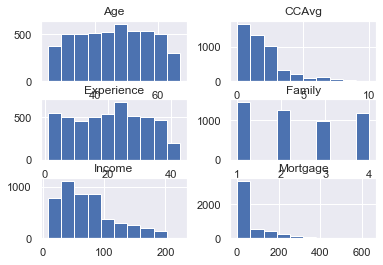

In [64]:
# Distribution of numerical column
banking.hist(column=['Age','Experience','Income', 'Family', 'CCAvg', 'Mortgage'])

#### From the histogram it appears that:
- Age, Experience and Family are normally distributed
- Average Credit Card Spend, Income and Mortgate are skewed

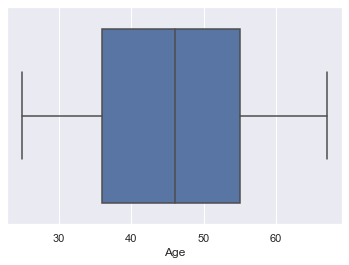

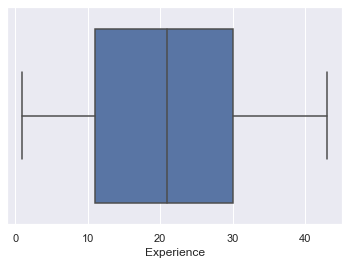

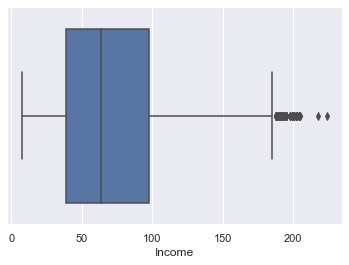

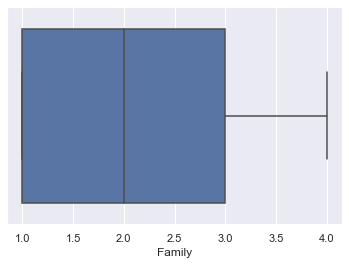

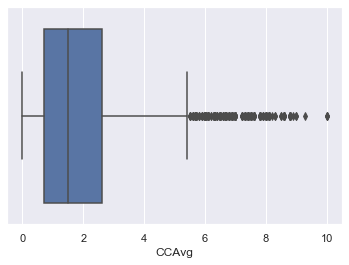

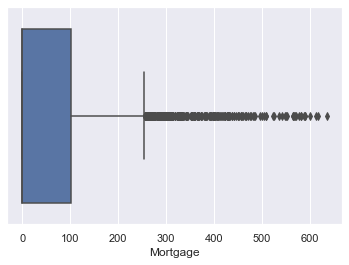

In [57]:
# Bar plots of categorical features
for feature in banking.dtypes[banking.dtypes != 'category'].index:
    sns.boxplot(banking[feature])
    plt.show()

    

#### Above Boxplots further confirm the following:
1. Age, Experience are quite uniformly distributed
2. This data appears to more for middle aged people with average age of 45 years and experience of 22 years
    which is quite realistic.
3. Most people in the distribution have 2 children and very few have 4. 
4. Mortgage and Average Credit Card Spend is highly skewed.

#### Pair plot for all columns

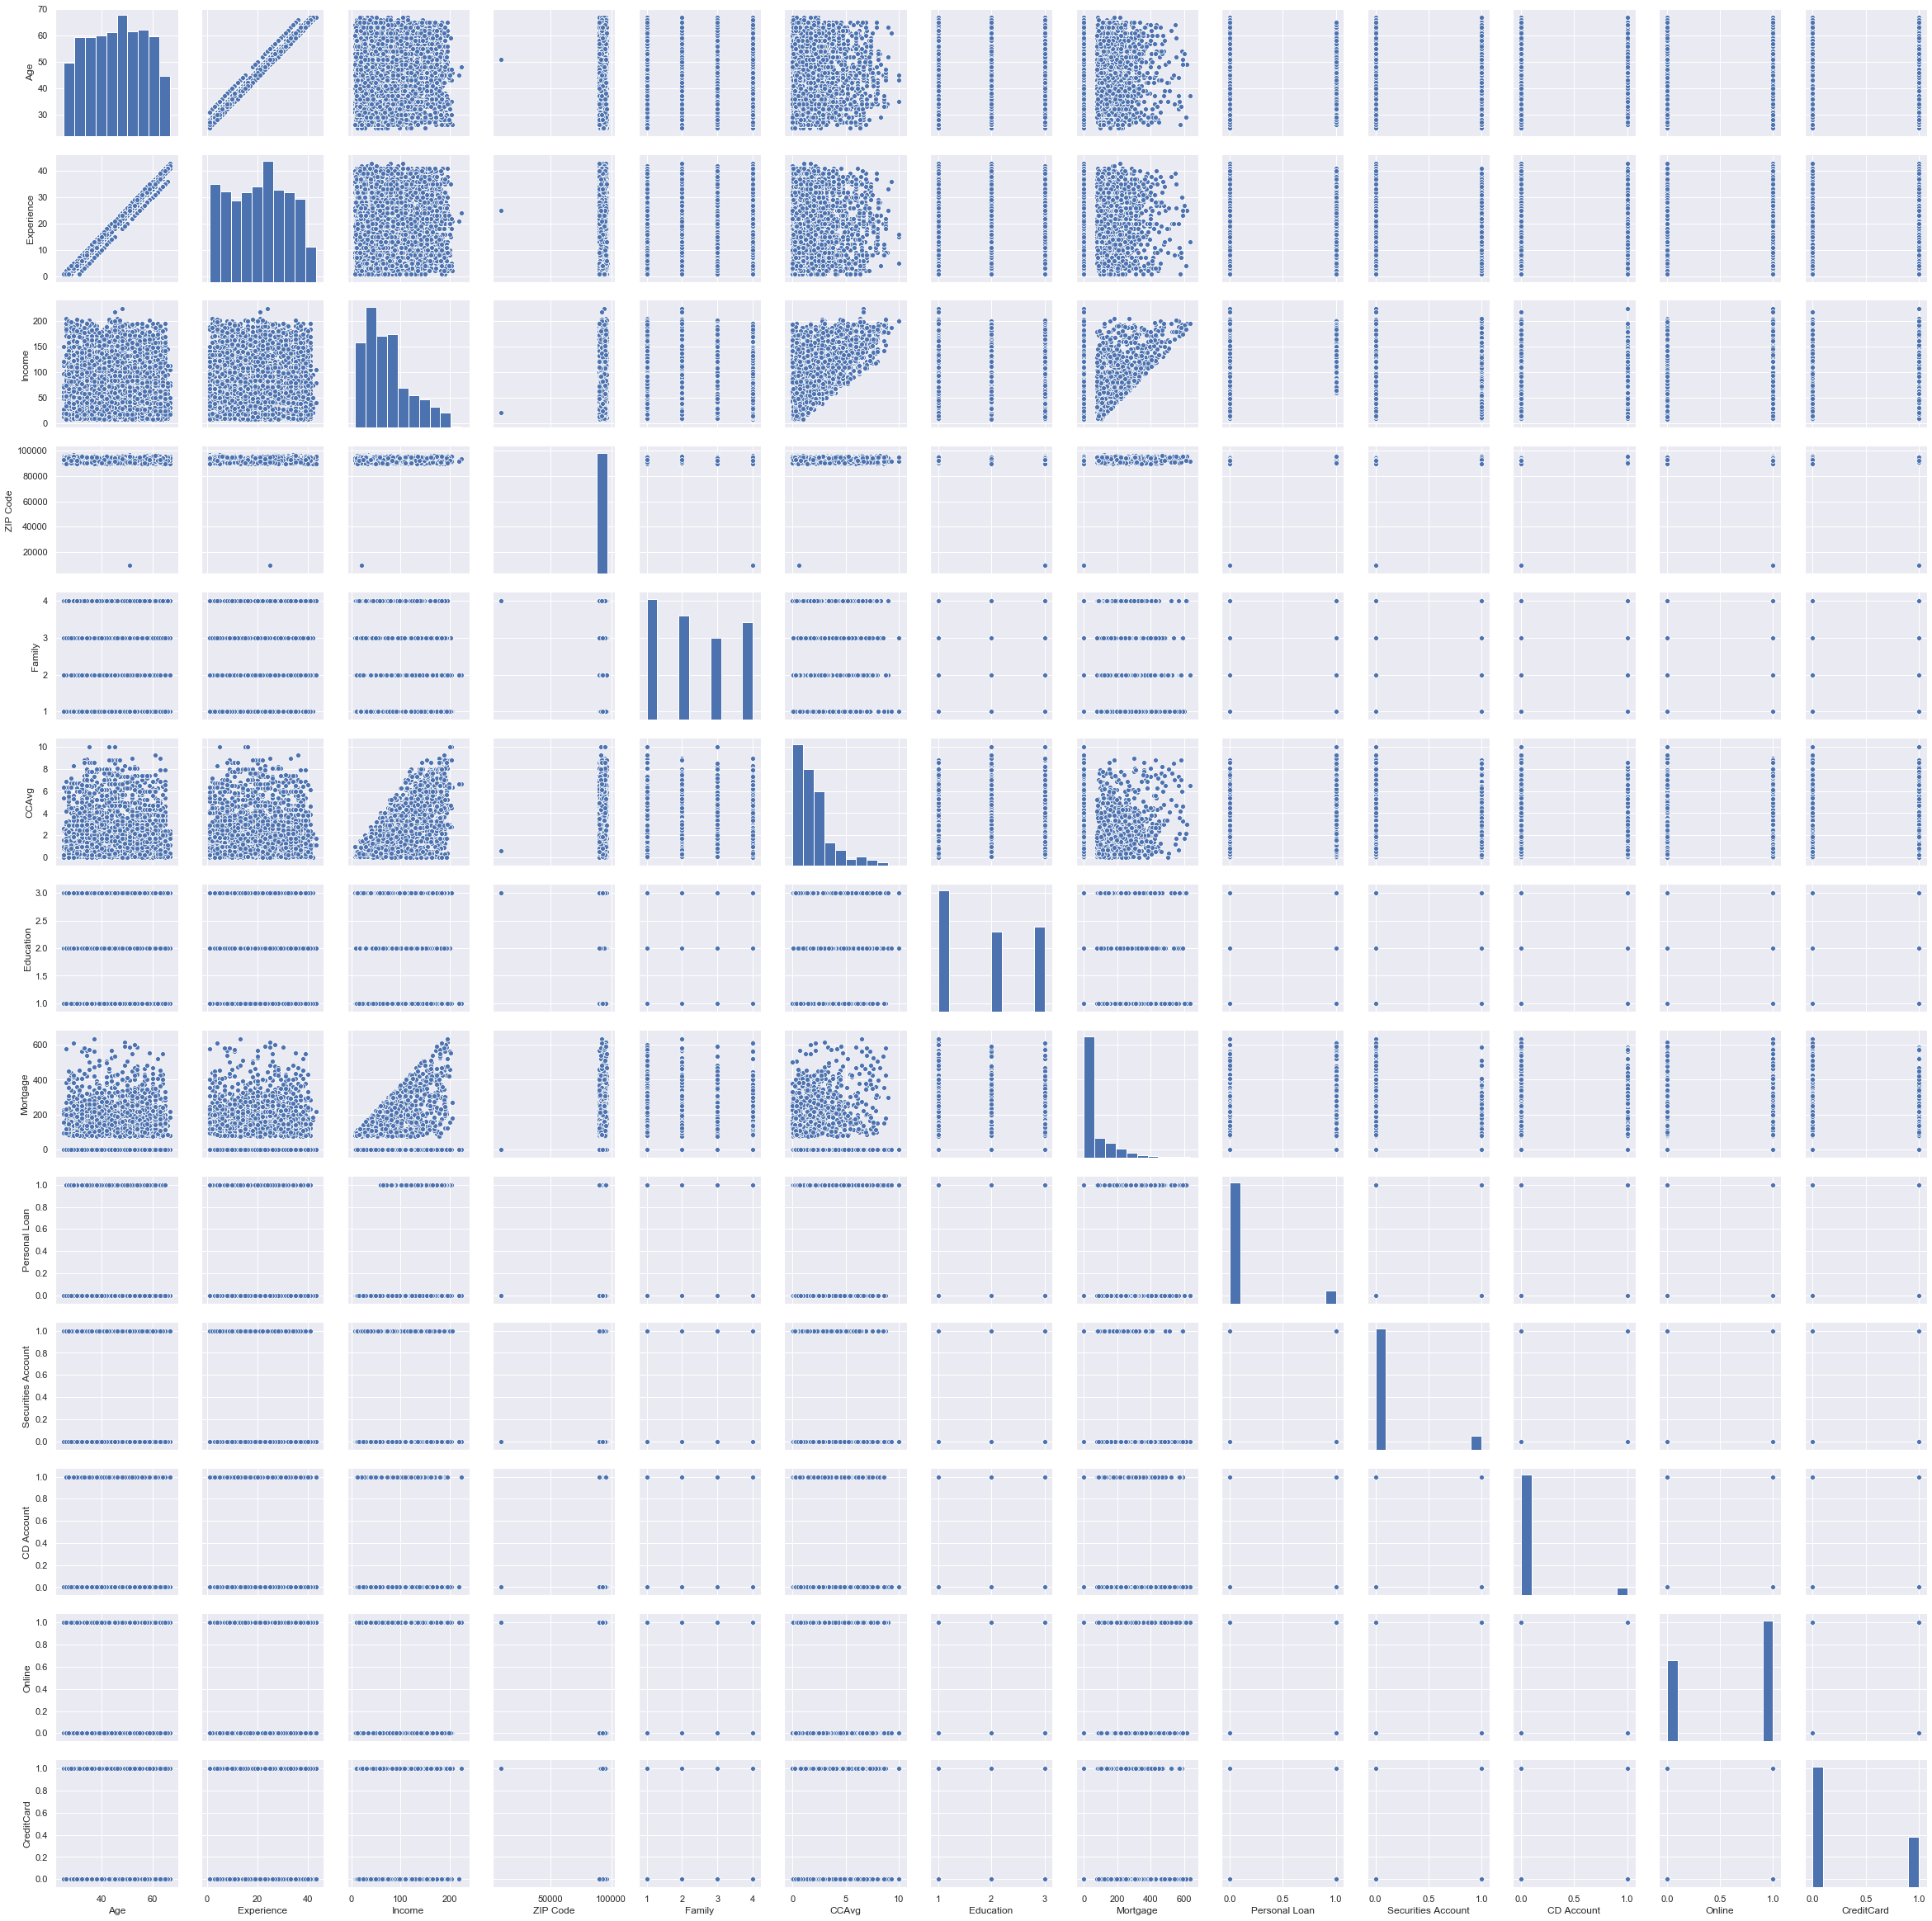

In [56]:
# Pairplot for all columns
sns.pairplot(banking)
plt.show()

#### The above pairplot shows the following trends:
1. Income is fairly distributed and is not dependent on age or experience.
2. Average Credit Card Spend and Mortgate increase with Income

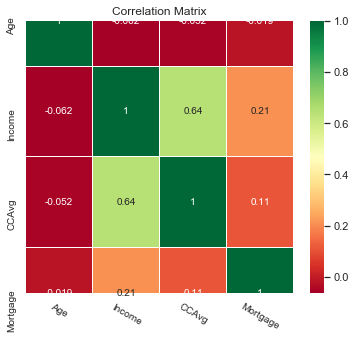

In [69]:
corr_data = banking[['Age','Income','CCAvg','Mortgage']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

#### Tranform categorical data into dummy variables
Dummy variables were used instead of continuous integers because these categorical variables are not ordinal. They simply represent different types rather than levels, so dummy variables are ideal to distinguish the effect of different categories.

In [110]:
# Transform Education Column to Category Codes
# banking = pd.get_dummies(banking, columns = ['Education'])

# Transform all Category Columns to Category Codes
for feature in banking.dtypes[banking.dtypes == 'category'].index:
    banking[feature] = banking[feature].cat.codes

banking.head()
banking.dtypes

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,Personal Loan
0,25,1,49,82,4,1.6,0,1,0,0,0,1,0,0,0
1,45,19,34,33,3,1.5,0,1,0,0,0,1,0,0,0
2,39,15,11,366,1,1.0,0,0,0,0,0,1,0,0,0
3,35,9,100,297,1,2.7,0,0,0,0,0,0,1,0,0
4,35,8,45,95,4,1.0,0,0,0,0,1,0,1,0,0


#### Feature Selection

The classification goal is to predict the likelihood of a liability customer buying personal loans.

Use columns that denote liability customers - CCAvg, Mortgage, CreditCard


The values of the 12 columns, which contain customer statistics, are selected as features while the value of the column, 'Personal Loan', is set as target.


In [102]:
# Reorder Columns to bring target to the end
# banking = banking[['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3', 'Personal Loan']]

In [192]:
# X = banking[['Family','Income','CCAvg', 'Mortgage', 'CreditCard','Securities Account', 'CD Account']]
X = banking[['CCAvg', 'Mortgage', 'CreditCard','Securities Account', 'CD Account']]
Y = banking['Personal Loan']

#array = banking.values

# Features: first 12 columns
#X = array[:,0:-1]

# Target variable: 'Personal Loan'
#Y = array[:,-1]

### Train/Test Split

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


In [194]:
# 30% of the data will be used for testing
test_size= 0.30
seed = 1
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

### Compare classification algorithms
Three different classification algorithms (Logistic Regression, K-Neighbors Classifier, and Gaussian NB) are run on the dataset and the best-performing one will be used to build the classification model.

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [209]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=300)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

In [210]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=seed)    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy', error_score='raise')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.931810 (0.018550)
KNN: 0.909865 (0.014175)
NB: 0.873278 (0.029761)


#### Logistic regression is the best performing model.

Among all algorithms, logistic regression achieved an accuracy of about 95%, suggesting a high level of strength of this model to classify the customer response given all the defined customer features.

#### Test LR model on the test set

In [198]:
LR = LogisticRegression(solver='lbfgs', max_iter=1000)
LR.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [199]:
predictions = LR.predict(X_test)

In [200]:
# Accuracy Score 
print(accuracy_score(Y_test, predictions))

0.9337883959044369


Accuracy score is the percentage of correct predictions out of all predictions made. The LR algorithm achieves an accuracy of 96.51%, suggesting high level of strength of this model to classify the customer response given all the defined customer features.

[[1314   22]
 [  92   37]]


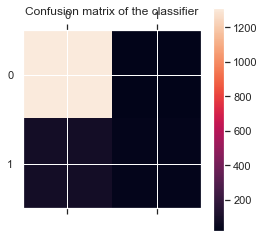

In [163]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_test, predictions))

cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

However, the result of accuracy score can possibly yield misleading result if the data set is unbalanced, because the number of observations in different classes largely vary.

A confusion matrix gives a detailed breakdown of prediction result and error types. Each cell in the matrix represents a combination of instances of the predicted response and the actual response. In the test set, the matrix proves that the algorithm performed well because most test results (1324 True Positive predictions) locate on the diagonal cells which represent correct predictions. 39 tests (False negative) predicted the bank’s client would subscribe to the Personal Loan but they actually did not.

A problem revealed by this confusion matrix is that the dataset is highly unbalanced, with nearly all client actually decline to subscribe. This infers that the accuracy score is biased, and further evaluation should be carried out to determine the accuracy of logistic regression model.

In [164]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1336
           1       0.63      0.29      0.39       129

    accuracy                           0.92      1465
   macro avg       0.78      0.64      0.68      1465
weighted avg       0.91      0.92      0.91      1465



Classification report shows the precision, recall, F1 and support scores for the LR classification model.

* Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 97%.

* Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 99% correctly that they would decline the offer.

In general, the report shows that LR model has great predictive power to identify the customers who would not subscribe to the Personal Loan. However, because of the limited number of clients accepting the Personal Loan, there is a need for stratified sampling or rebalancing to deal with this structural weakness before we conclude whether LR algorithm can accurately classify those who are more likely to subscribe.